<a href="https://colab.research.google.com/github/Advworks/ani-scape/blob/main/notebooks/01_eda_top_anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup And Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/top_anime.csv')  # Adjust if needed
df.head()


,title,score,rank,popularity,episodes,type,aired_from,status,genres
0,Sousou no Frieren,9.31,1.0,156,28.0,TV,2023-09-29T00:00:00+00:00,Finished Airing,"Adventure, Drama, Fantasy"
1,Fullmetal Alchemist: Brotherhood,9.10,2.0,3,64.0,TV,2009-04-05T00:00:00+00:00,Finished Airing,"Action, Adventure, Drama, Fantasy"
2,Steins;Gate,9.07,3.0,14,24.0,TV,2011-04-06T00:00:00+00:00,Finished Airing,"Drama, Sci-Fi, Suspense"
3,One Piece Fan Letter,9.05,5.0,2237,1.0,TV Special,2024-10-20T00:00:00+00:00,Finished Airing,"Action, Adventure, Fantasy"
4,Shingeki no Kyojin Season 3 Part 2,9.05,4.0,21,10.0,TV,2019-04-29T00:00:00+00:00,Finished Airing,"Action, Drama, Suspense"


Basic Overview

In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       125 non-null    object 
 1   score       125 non-null    float64
 2   rank        123 non-null    float64
 3   popularity  125 non-null    int64  
 4   episodes    123 non-null    float64
 5   type        125 non-null    object 
 6   aired_from  125 non-null    object 
 7   status      125 non-null    object 
 8   genres      124 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 8.9+ KB


,0
title,0
score,0
rank,2
popularity,0
episodes,2
type,0
aired_from,0
status,0
genres,1


Top Genres

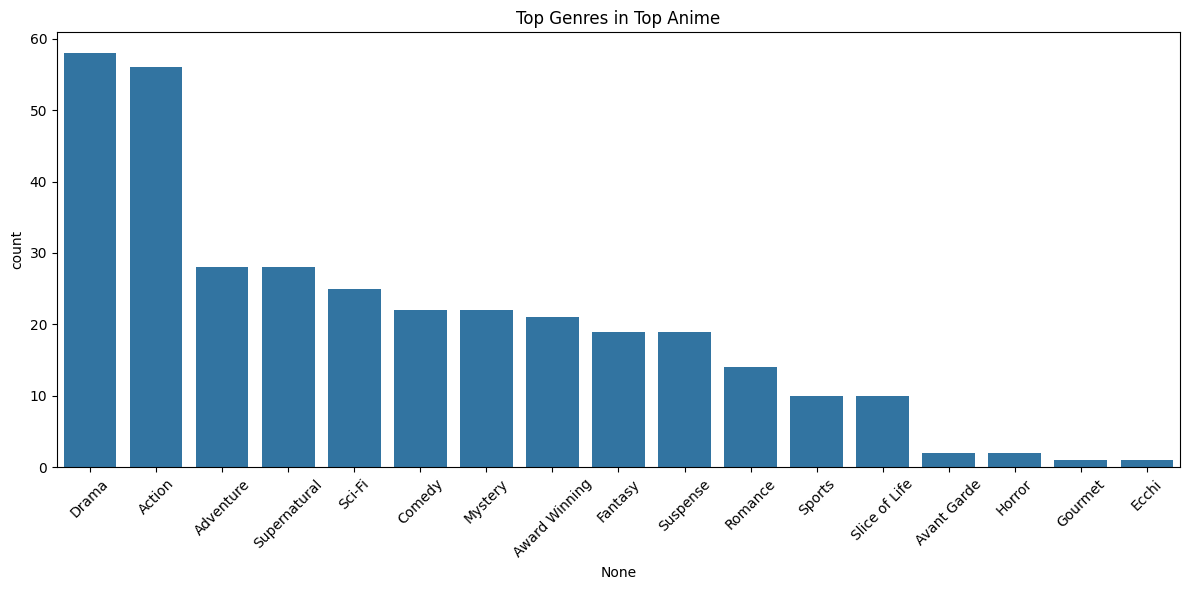

In [3]:
# Split the genre column and count genre frequency
from collections import Counter

genre_counts = Counter()
for genres in df['genres'].dropna():
    for genre in genres.split(', '):
        genre_counts[genre] += 1

# Convert to DataFrame for plotting
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count'])
genre_df = genre_df.sort_values('count', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=genre_df.index, y=genre_df['count'])
plt.xticks(rotation=45)
plt.title("Top Genres in Top Anime")
plt.tight_layout()
plt.show()


Top Rated

In [4]:
top_rated = df.sort_values('score', ascending=False).head(10)
top_rated[['title', 'score', 'rank']]


,title,score,rank
0,Sousou no Frieren,9.31,1.0
1,Fullmetal Alchemist: Brotherhood,9.10,2.0
2,Steins;Gate,9.07,3.0
3,One Piece Fan Letter,9.05,5.0
4,Shingeki no Kyojin Season 3 Part 2,9.05,4.0
5,Gintama°,9.05,6.0
6,Gintama: The Final,9.04,7.0
7,Hunter x Hunter (2011),9.03,8.0
8,Gintama',9.02,9.0
9,Gintama': Enchousen,9.02,10.0


Trend by Release Year

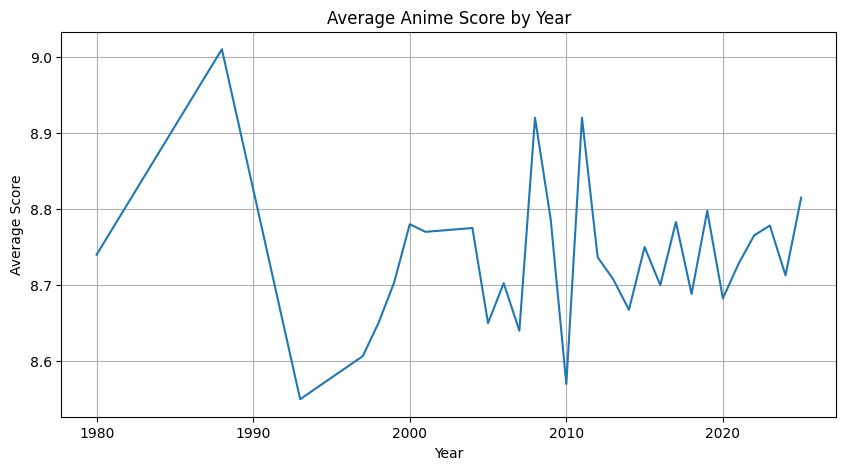

In [5]:
df['year'] = pd.to_datetime(df['aired_from']).dt.year
yearly_avg = df.groupby('year')['score'].mean().dropna()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values)
plt.title("Average Anime Score by Year")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.grid(True)
plt.show()


Dig into studio performance

Compare seasonal releases

Build genre × year heatmap

Create a recommender system later